In [1]:
import cantera as ct
import matplotlib.pyplot as plt
import polars

from cantera_practice import reactors

In [2]:
model = ct.Solution("data/webb_cyclopentane.yaml")
conc_df = polars.read_csv("data/webb_concentrations.csv")

In [3]:
temp = 825
pres = 1.1 * ct.one_atm  # in atm.
concs = conc_df.select("CPT(563)", "N2", "O2(6)").rows(named=True)

tau = 4  # s
vol = 1 * (1e-2) ** 3  # m3

In [4]:
# Create a SolutionArray to store values for the above points
solns = ct.SolutionArray(model)

In [5]:
for conc in concs:
    print(f"Starting simulation for {conc}")
    reactor = reactors.jsr(model=model, temp=temp, pres=pres, tau=tau, vol=vol, conc=conc)
    solns.append(reactor.thermo.state)

Starting simulation for {'CPT(563)': 0.005, 'N2': 0.9825, 'O2(6)': 0.0125}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.97625, 'O2(6)': 0.01875}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.973571429, 'O2(6)': 0.021428571}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.97, 'O2(6)': 0.025}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.965, 'O2(6)': 0.03}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.960909091, 'O2(6)': 0.034090909}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.9575, 'O2(6)': 0.0375}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.953333333, 'O2(6)': 0.041666667}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.945, 'O2(6)': 0.05}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.937307692, 'O2(6)': 0.057692308}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.9325, 'O2(6)': 0.0625}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.926818182, 'O2(6)': 0.068181818}
Starting simulation for {'CPT(563)': 0.005, 'N2': 0.92, '

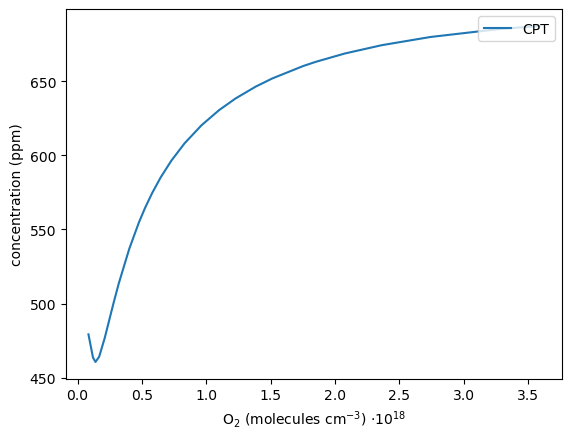

In [6]:
plt.figure()
plt.plot(
    solns("O2(6)").X * 9.782586051, solns("C5H8(522)").X * 10**6, color="C0", label="CPT"
)

plt.xlabel(r"O$_2$ (molecules cm$^{-3}$) $\cdot 10^{18}$")
plt.ylabel("concentration (ppm)")

plt.legend(loc=1)

In [15]:
species_names = [
    "O2(6)",        # oxygen
    "CPT(563)",     # cyclopentane
    "C5H8(522)",    # cyclopentene
    "C5H8O(825)",   # 1,2-epoxycyclopentane
    "C3H4O(165)",   # acrolein
    "CH3CHO(41)",   # acetaldehyde
]
conc_df = conc_df.with_columns(*(polars.Series(n, solns(n).X.flatten()) for n in species_names))
conc_df.write_csv("data/webb_reference.csv")
conc_df

phi,Oxygen Concentration (molecules*cm^-3 *10^-18),CPT(563),N2,O2(6),C5H8(522),C5H8O(825),C3H4O(165),CH3CHO(41)
f64,f64,f64,f64,f64,f64,f64,f64,f64
3.0,0.12233,0.002338,0.9825,0.00859,0.000479,0.000028,0.000345,0.000039
2.0,0.1835,0.001597,0.97625,0.012201,0.000463,0.000033,0.000319,0.000051
1.75,0.20962,0.001451,0.973571,0.014156,0.000461,0.000035,0.0003,0.00005
1.5,0.24456,0.001332,0.97,0.017066,0.000464,0.000036,0.000276,0.000048
1.25,0.29347,0.001243,0.965,0.021525,0.000477,0.000039,0.000247,0.000043
…,…,…,…,…,…,…,…,…
0.17,2.15785,0.001129,0.774412,0.212158,0.000669,0.000062,0.000072,0.000009
0.15,2.44557,0.001131,0.745,0.241601,0.000674,0.000063,0.000068,0.000008
0.13,2.75147,0.001134,0.706538,0.280083,0.00068,0.000064,0.000063,0.000007
